# Regresión lineal

**Usaremos:**
- Data: el dataframe cars, en R (no requiere ningún paquete adicional)
- Descripción: El data frame contiene 50 observaciones de la velocidad de los autos y la distancia requerida de frenado. (Los datos corresponden a los años 1920)

**Definimos:**

- $Y$ = Distancia de frenado (en pies)
- $X$ = Velocidad (en millas por hora).

**1. Cargar los datos del paquete cars en el objeto autos**

Lo primero que hago es visualizar los primeros elementos del dataframe con head

In [1]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


In [2]:
velocidad<-cars$speed
X<-velocidad

In [3]:
distancia<-cars$dist
Y<-distancia

**2. Realice el diagrama de dispersion para X vs. Y . ¿Que observa?**

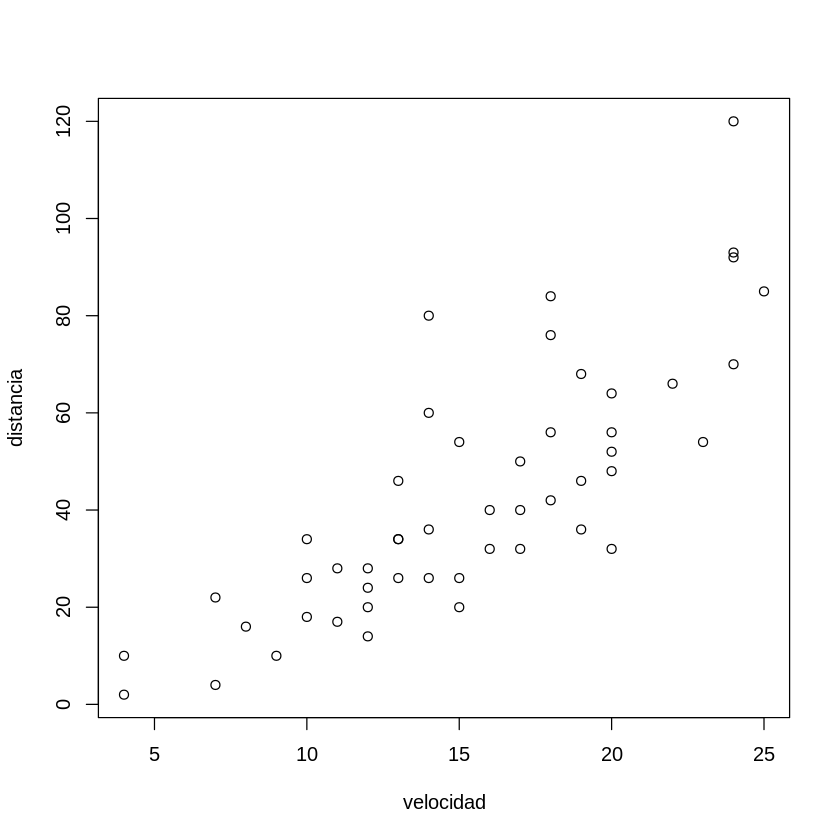

In [4]:
plot(velocidad,distancia)
p <- recordPlot()

Observo que los datos parecen seguir un comportamiento casi lineal. Las variables estan correlacionadas positivamente.

**3. Estime la media y el desvío standard de cada una de las variables**

In [5]:
mean(distancia)

[1] 42.98

In [6]:
mean(velocidad)

[1] 15.4

In [7]:
sd(distancia)

[1] 25.76938

In [8]:
sd(velocidad)

[1] 5.287644

**4. Si se plantea un modelo:** 
$E[Y_{i}|X_{i}] = \beta_0 + \beta_1 X_i \hspace{10mm} i = 1, 2, . . . , 50$
                                
**Halle los estimadores de mínimos cuadrados de βo y β1.** 

**Graficar la recta de cuadrados mínimos sobre el gráfico realizado en (2).**

Si bien esto se puede realizar utilizando la función _lm()_ decidimos hacer esto con las cuentas teóricas:

In [9]:
b1 = ( sum(X*Y)- (1/50) * sum (X) * sum (Y) ) / ( sum(X^2) - (1/50) * ( sum(X))^2 )

In [10]:
print(b1)

[1] 3.932409


In [11]:
b0 = mean(Y) - b1 * mean(X)

In [12]:
print(b0)

[1] -17.57909


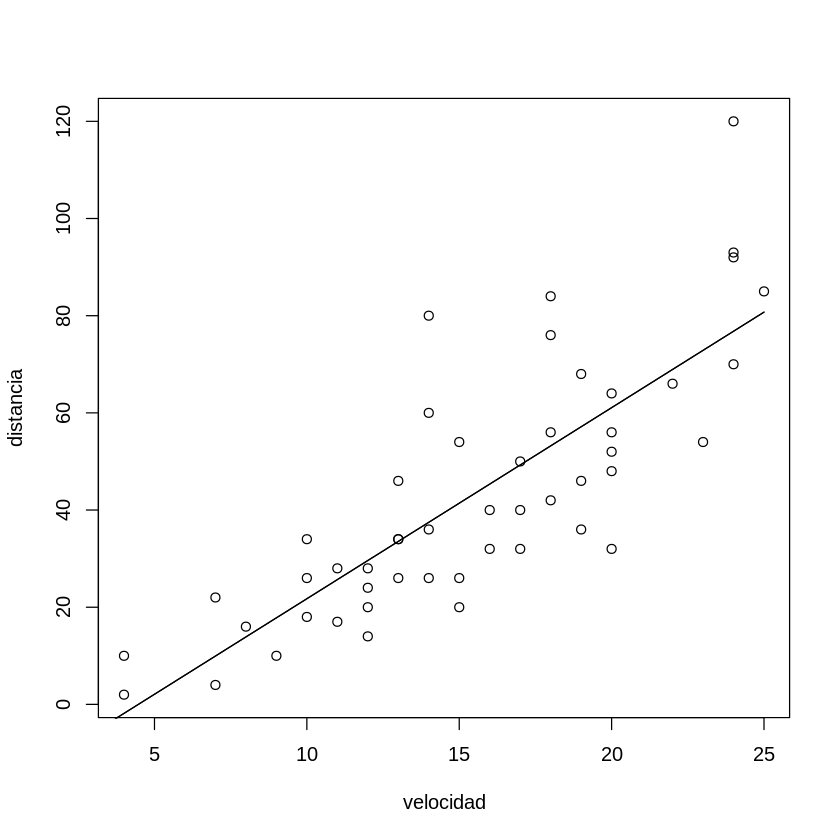

In [13]:
replayPlot(p) 

t<-seq(0,25,0.1)
recta<-b0 + b1 * t
points(t,recta, type = "l", ylim = c(0,120))
lines(t,recta, type = "l", ylim = c(0,120))

p <- recordPlot()

**5. Superponer sobre el grafico anterior, en color naranja, los puntos correspondientes a los valores
predichos**

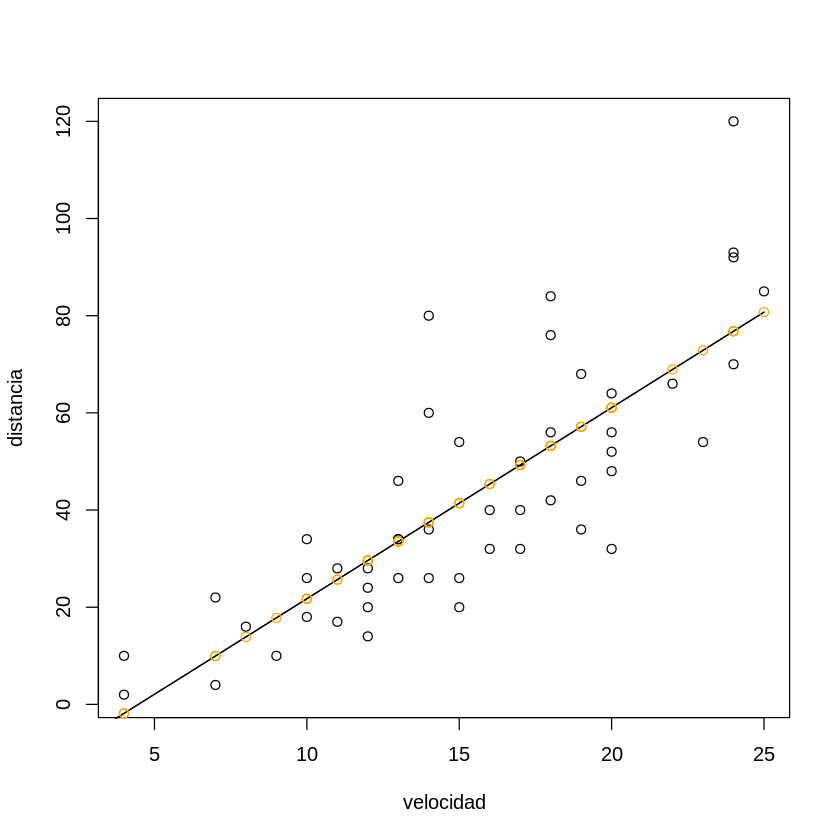

In [14]:
replayPlot(p)
points(X, b0 + b1 * X, col = "orange")
p<-recordPlot()

**6. ¿Cuánto vale el estimador de $σ^2$?**

In [15]:
RSS <-  sum ( ( Y- (b0 + b1 * X) ) ^ 2 )
sigma2 <- RSS/(50 - 2)
print(sigma2)

[1] 236.5317


**7. Estime la matriz de covarianza de los estimadores obtenidos. ¿Cuanto vale en este caso la matriz
X'X?**

In [16]:
XtX <- t(model.matrix(~X)) %*% model.matrix(~X)
print(XtX)

            (Intercept)     X
(Intercept)          50   770
X                   770 13228


In [17]:
matrizCovB = sigma2 * solve(XtX)
print (matrizCovB)

            (Intercept)          X
(Intercept)   45.676514 -2.6588234
X             -2.658823  0.1726509


**8. Verifique que $\sum(Y_i − \hat{Y_i})$ = 0.**

In [18]:
sum(Y-(b0+b1 * X))

[1] 1.776357e-13

Es aproximadamente 0

**10. Ajustar un modelo polinomial que prediga $Y$ usando $X$ y $X^2$. Graficar la curva obtenida sobre el gráfico realizado en (2).**

In [22]:
regresion_lineal <- lm(dist ~  speed + I(speed^2) , data = cars)
summary(regresion_lineal)


Call:
lm(formula = dist ~ speed + I(speed^2), data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
speed        0.91329    2.03422   0.449    0.656
I(speed^2)   0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


In [20]:
b0_2 = 2.47014
b1_2 = 0.91329
b2 = 0.09996

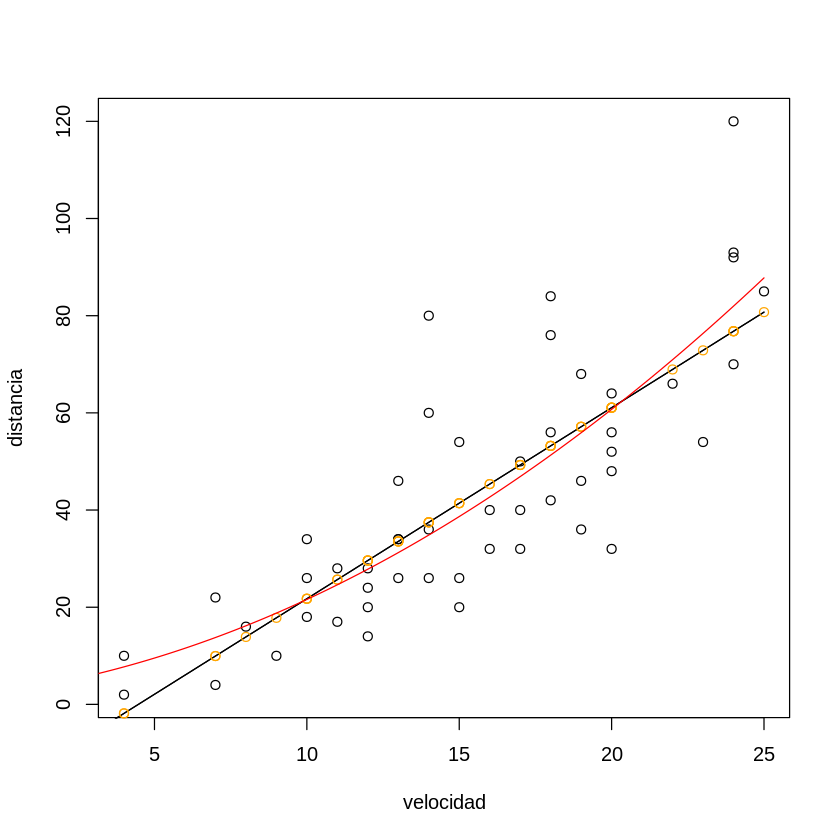

In [21]:
replayPlot(p)
Ycuadratico = b0_2 + b1_2 * t + b2 * t^2
points(t, Ycuadratico, type = 'l', col = 'red')